## Taller 1

Librerias

In [143]:
#Advertencias
import warnings
warnings.filterwarnings('ignore')

#tratamiento de datos
import pandas as pd
import numpy as np

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

#Preparación de datos
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector
from sklearn import set_config

#Modelado
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#Evaluación
from sklearn.metrics import accuracy_score, confusion_matrix

Cargar datos punto 1

In [144]:
datos = pd.read_csv('modern_bank.csv')
datos.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Exploracion de datos

In [145]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Datos nulos

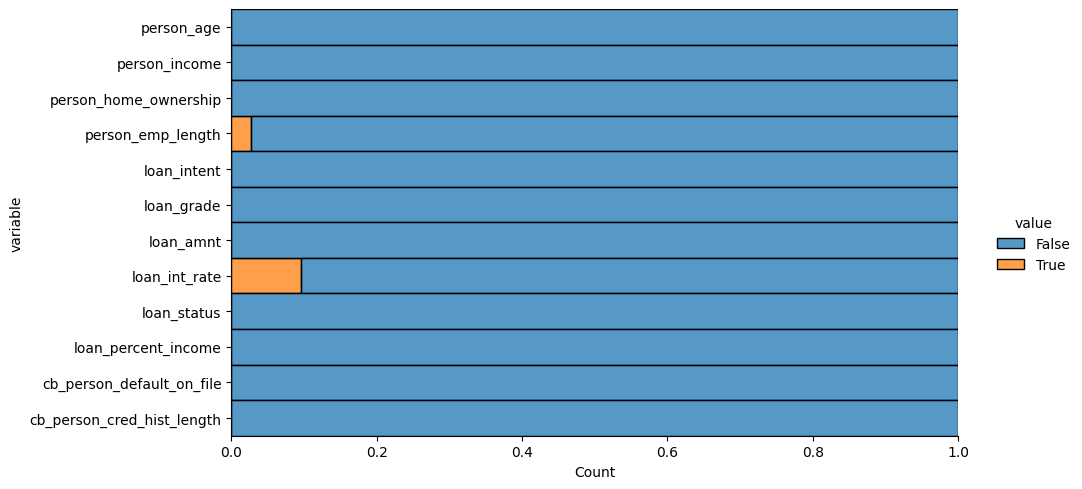

In [146]:

datos.isnull().melt().pipe(lambda df: sb.displot(data = df, y = 'variable', hue = 'value', multiple = 'fill', aspect = 2))
plt.show()

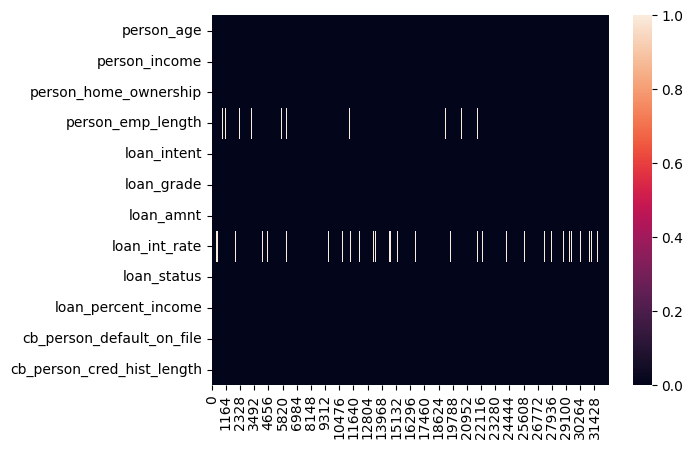

In [147]:
datos.isnull().transpose().pipe(lambda df: (sb.heatmap(data = df)))
plt.show()

In [148]:
datos.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [149]:
## Como no son muchos eliminar filas
datos_proc = datos
datos_proc = datos_proc.dropna(how='any',axis=0)

In [150]:
datos_proc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [151]:
count_greater = (datos_proc['person_age'] > 120).sum()
count_greater


4

In [152]:
datos_proc.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


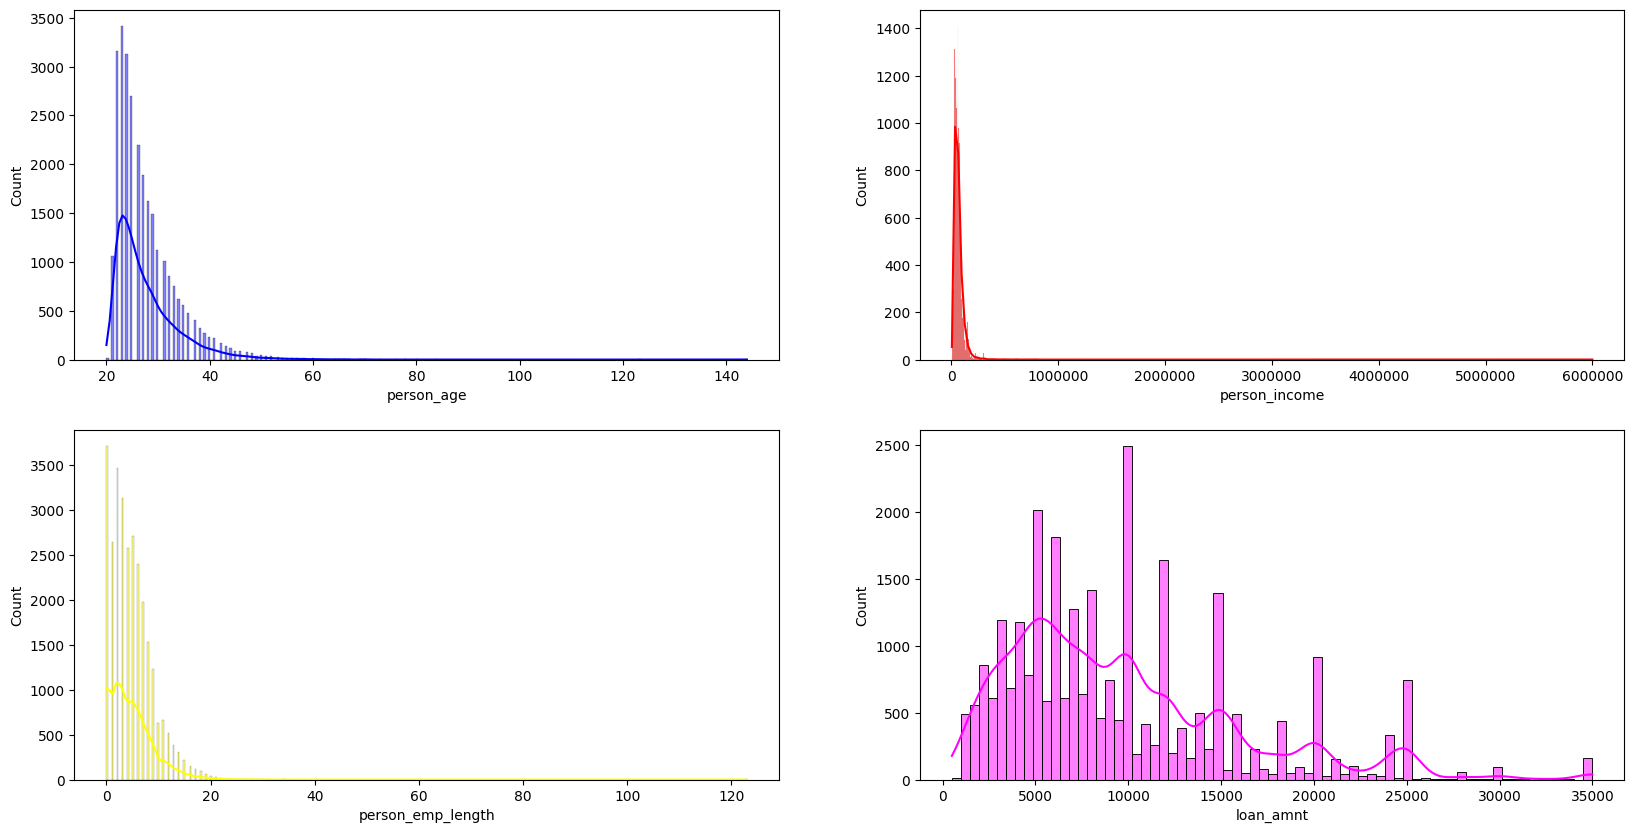

In [153]:
fig, ax = plt.subplots(2,2,figsize = (20,10))
sb.histplot(data = datos_proc, x = 'person_age', color = 'blue', kde = True, ax = ax[0,0])
sb.histplot(data = datos_proc, x = 'person_income', color = 'red', kde = True, ax = ax[0,1])
sb.histplot(data = datos_proc, x = 'person_emp_length', color = 'yellow', kde = True, ax = ax[1,0])
sb.histplot(data = datos_proc, x = 'loan_amnt', color = 'magenta', kde = True, ax = ax[1,1])
ax[0, 1].ticklabel_format(style='plain', axis='x')
plt.show()

<Axes: xlabel='loan_percent_income', ylabel='Count'>

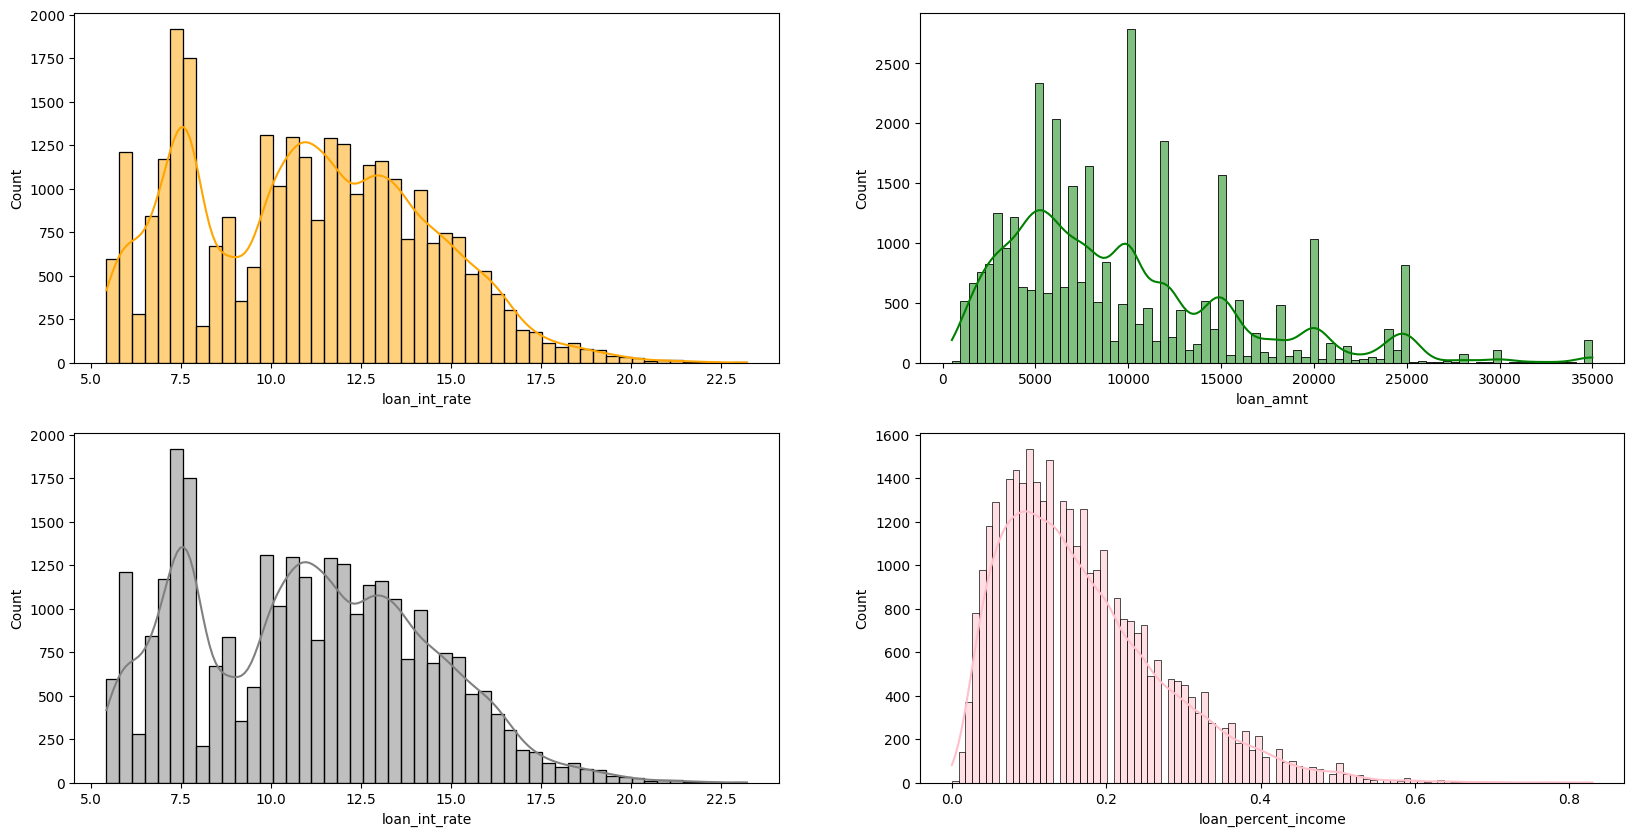

In [154]:
fig, ax = plt.subplots(2,2,figsize = (20,10))
sb.histplot(data = datos, x = 'loan_int_rate', color = 'orange', kde = True, ax = ax[0,0])
sb.histplot(data = datos, x = 'loan_amnt', color = 'green', kde = True, ax = ax[0,1])
sb.histplot(data = datos, x = 'loan_int_rate', color = 'gray', kde = True, ax = ax[1,0])
sb.histplot(data = datos, x = 'loan_percent_income', color = 'pink', kde = True, ax = ax[1,1])

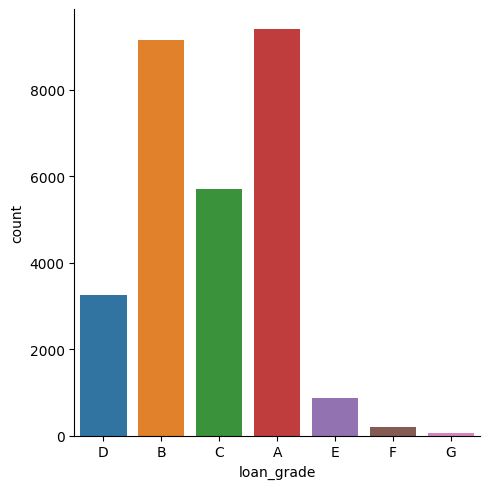

In [155]:
#Gráficos de barras

sb.catplot(data = datos_proc, x = 'loan_grade', kind = 'count')
plt.show()

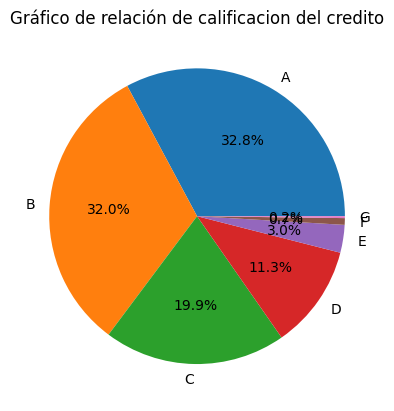

In [156]:
#Graficos de pastel

plt.pie(x = datos_proc.loan_grade.value_counts(), labels = datos.loan_grade.value_counts().index, autopct = '%0.1f%%')
plt.title('Gráfico de relación de calificacion del credito')
plt.show()

In [157]:
datos.loan_grade.value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

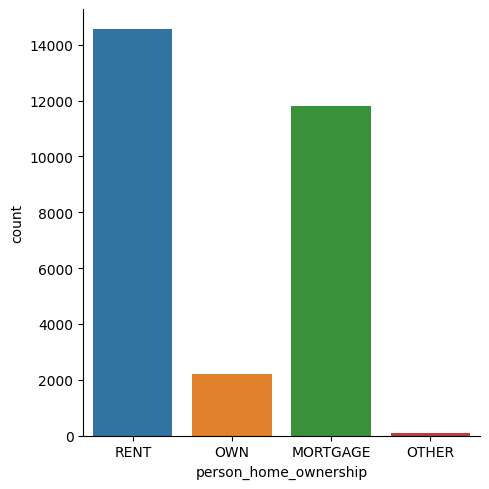

In [158]:
sb.catplot(data = datos_proc, x = 'person_home_ownership', kind = 'count')
plt.show()

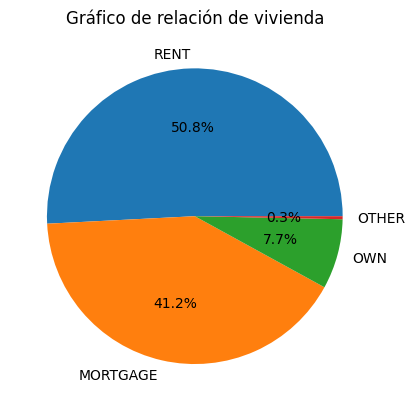

In [159]:
plt.pie(x = datos_proc.person_home_ownership.value_counts(), labels = datos.person_home_ownership.value_counts().index, autopct = '%0.1f%%')
plt.title('Gráfico de relación de vivienda')
plt.show()

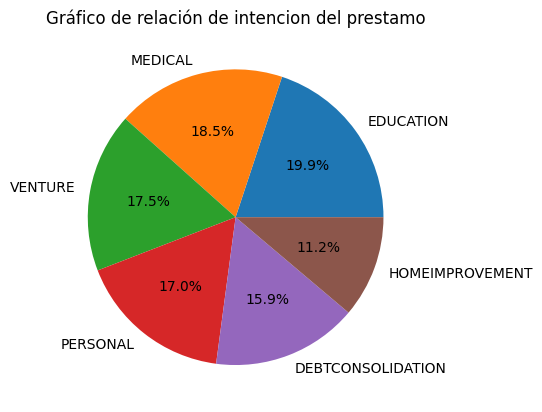

In [160]:
plt.pie(x = datos_proc.loan_intent.value_counts(), labels = datos.loan_intent.value_counts().index, autopct = '%0.1f%%')
plt.title('Gráfico de relación de intencion del prestamo')
plt.show()

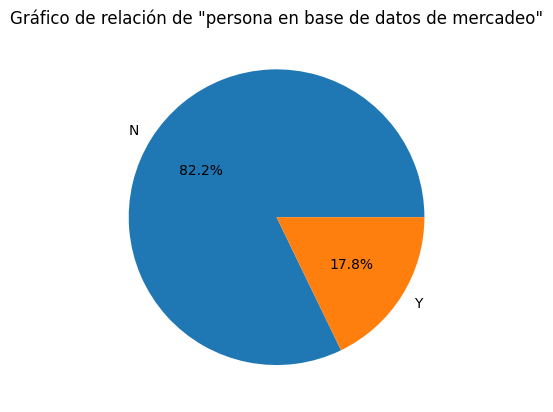

In [161]:
plt.pie(x = datos_proc.cb_person_default_on_file.value_counts(), labels = datos.cb_person_default_on_file.value_counts().index, autopct = '%0.1f%%')
plt.title('Gráfico de relación de "persona en base de datos de mercadeo"')
plt.show()
#Eliminar con mas del 80% es para la maquina vectorial, hacerlo despues de la preparacion de los datos

In [162]:
datos_proc.describe(include = 'object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,28638,28638,28638,28638
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,14551,5704,9402,23535


## Preparacion de datos

In [163]:
# Eliminar datos atipicos, personas mas de 120 años
datos_proc.drop(datos_proc[datos_proc['person_age'] >= 120].index, inplace = True)

In [164]:
# Transformacion de la y
#datos_proc["loan_grade"] = np.where(datos_proc["loan_grade"]
mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
datos_proc["loan_grade"] = datos_proc["loan_grade"].replace(mapping)
datos_proc.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,3,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,2,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,2,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,2,35000,14.27,1,0.55,Y,4


In [165]:
#Identificación de la cantidad

datos0 = datos_proc[datos_proc['loan_grade'] == 0]
datos0.shape

(9402, 12)

In [166]:
datos1 = datos_proc[datos_proc['loan_grade'] == 1]
datos1.shape

(9149, 12)

In [167]:
datos2 = datos_proc[datos_proc['loan_grade'] == 2]
datos2.shape

(5697, 12)

In [168]:
datos3 = datos_proc[datos_proc['loan_grade'] == 3]
datos3.shape

(3248, 12)

In [169]:
datos4 = datos_proc[datos_proc['loan_grade'] == 4]
datos4.shape

(870, 12)

In [170]:
datos5 = datos_proc[datos_proc['loan_grade'] == 5]
datos5.shape

(209, 12)

In [171]:
datos6 = datos_proc[datos_proc['loan_grade'] == 6]
datos6.shape

(59, 12)

In [172]:

datos1 = datos1.sample(datos0.shape[0], replace = True)
datos1.shape

(9402, 12)

In [173]:
datos2 = datos2.sample(datos0.shape[0], replace = True)
datos2.shape

(9402, 12)

In [174]:
datos3 = datos3.sample(datos0.shape[0], replace = True)
datos4 = datos4.sample(datos0.shape[0], replace = True)
datos5 = datos5.sample(datos0.shape[0], replace = True)
datos6 = datos6.sample(datos0.shape[0], replace = True)

In [175]:
#remuestreo

datos_proc = pd.concat([datos0, datos1, datos2, datos3, datos4, datos5, datos6])
datos_proc.shape

(65814, 12)

In [176]:
# reset del index pq se jode con lo anterior
datos_proc = datos_proc.reset_index()
datos_proc

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,5,21,9900,OWN,2.0,VENTURE,0,2500,7.14,1,0.25,N,2
1,8,24,83000,RENT,8.0,PERSONAL,0,35000,8.90,1,0.42,N,2
2,11,21,10000,OWN,2.0,HOMEIMPROVEMENT,0,4500,8.63,1,0.45,N,2
3,12,23,95000,RENT,2.0,VENTURE,0,35000,7.90,1,0.37,N,2
4,14,23,115000,RENT,2.0,EDUCATION,0,35000,7.90,0,0.30,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65809,29217,37,88000,RENT,4.0,PERSONAL,6,25000,19.66,1,0.28,Y,12
65810,28292,28,82000,RENT,12.0,VENTURE,6,16750,20.11,1,0.20,N,6
65811,31853,42,153000,MORTGAGE,7.0,EDUCATION,6,25000,20.53,1,0.16,N,14
65812,27016,34,108000,MORTGAGE,4.0,DEBTCONSOLIDATION,6,25000,20.03,1,0.23,N,8


In [177]:
datos_proc = datos_proc.drop("index", axis = 1 )
datos_proc

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9900,OWN,2.0,VENTURE,0,2500,7.14,1,0.25,N,2
1,24,83000,RENT,8.0,PERSONAL,0,35000,8.90,1,0.42,N,2
2,21,10000,OWN,2.0,HOMEIMPROVEMENT,0,4500,8.63,1,0.45,N,2
3,23,95000,RENT,2.0,VENTURE,0,35000,7.90,1,0.37,N,2
4,23,115000,RENT,2.0,EDUCATION,0,35000,7.90,0,0.30,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
65809,37,88000,RENT,4.0,PERSONAL,6,25000,19.66,1,0.28,Y,12
65810,28,82000,RENT,12.0,VENTURE,6,16750,20.11,1,0.20,N,6
65811,42,153000,MORTGAGE,7.0,EDUCATION,6,25000,20.53,1,0.16,N,14
65812,34,108000,MORTGAGE,4.0,DEBTCONSOLIDATION,6,25000,20.03,1,0.23,N,8


## Hallar correlacion

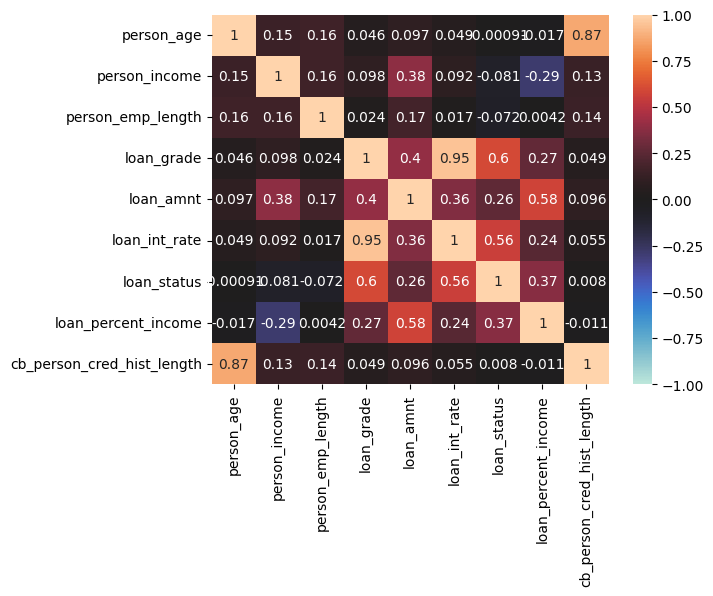

In [178]:
sb.heatmap(data=datos_proc.corr(numeric_only = True), center = 0, vmax=1, vmin = -1, annot = True)
plt.show ()

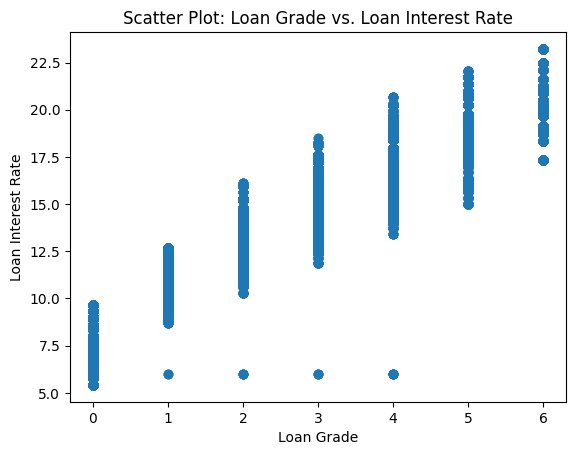

In [179]:
plt.scatter(datos_proc['loan_grade'], datos_proc['loan_int_rate'])
plt.xlabel('Loan Grade')
plt.ylabel('Loan Interest Rate')
plt.title('Scatter Plot: Loan Grade vs. Loan Interest Rate')
plt.show()

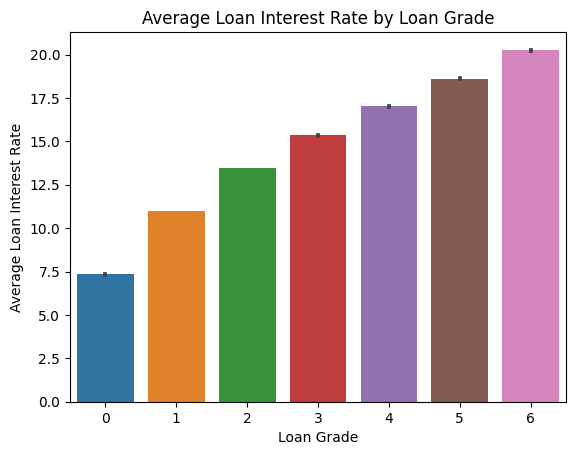

In [180]:
sb.barplot(x='loan_grade', y='loan_int_rate', data=datos_proc)
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Interest Rate')
plt.title('Average Loan Interest Rate by Loan Grade')
plt.show()

In [181]:
correlation = datos_proc['loan_grade'].corr(datos_proc['loan_int_rate'])
correlation

0.9529044520096251

## A) Usar variable loan_int_rate para el modelo 

In [182]:
# Separar X de Y
# x_a: x del punto a
columns_to_drop = ['person_age', 'person_income','person_home_ownership', 'person_emp_length','loan_intent', 'loan_amnt','loan_status','loan_grade', 'loan_percent_income','cb_person_default_on_file'
                   ,'cb_person_cred_hist_length'  ]
X_a = datos_proc.drop(columns = columns_to_drop)
Y_a = datos_proc[['loan_grade']]
X_a

,loan_int_rate
0,7.14
1,8.90
2,8.63
3,7.90
4,7.90
...,...
65809,19.66
65810,20.11
65811,20.53
65812,20.03


In [183]:
Y_a

,loan_grade
0,0
1,0
2,0
3,0
4,0
...,...
65809,6
65810,6
65811,6
65812,6


In [184]:
# Procesador de datos
# no se si hace falta un catTransformes cuando no ha variables categoricas....
numCols_a = X_a.select_dtypes(include = ['float64','int64']).columns.to_list()
catCols_a = X_a.select_dtypes(include = ['object']).columns.to_list()
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])
catTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])
preprocesador_a = ColumnTransformer(transformers = [('num', numTransformer, numCols_a), ('cat', catTransformer, catCols_a)], remainder = 'passthrough')
set_config(display = 'diagram')
preprocesador_a

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['loan_int_rate']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])

In [185]:
Xpre_a = preprocesador_a.fit_transform(X_a)
Xpre_a

array([[0.09662921],
       [0.19550562],
       [0.18033708],
       ...,
       [0.8488764 ],
       [0.82078652],
       [1.        ]])

In [186]:
labels_a = np.concatenate([numCols_a])
Xpro_a = pd.DataFrame(Xpre_a, columns = labels_a)
Xpro_a 

,loan_int_rate
0,0.096629
1,0.195506
2,0.180337
3,0.139326
4,0.139326
...,...
65809,0.800000
65810,0.825281
65811,0.848876
65812,0.820787


## Separacion de entrenamiento y prueba

In [187]:
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(Xpro_a, Y_a, train_size = 0.7, random_state = 126)

## Modelo de datos

Regresion logistica

In [188]:
modelo_a = LogisticRegression()
modelo_a.fit(X_train_a, Y_train_a)

LogisticRegression()

In [189]:
# Traer información
modelo_a.intercept_

array([ 22.96285816,  17.02926797,   8.96580608,   0.80990483,
        -6.93754065, -15.20146155, -27.62883484])

In [190]:
modelo_a.coef_

array([[-59.03554881],
       [-31.3931923 ],
       [-10.4910611 ],
       [  5.65484717],
       [ 18.54265788],
       [ 30.45066769],
       [ 46.27162947]])

## Evaluación del modelo

Modelo a: Entrenamiento

0.7402591764527122


<function matplotlib.pyplot.show(close=None, block=None)>

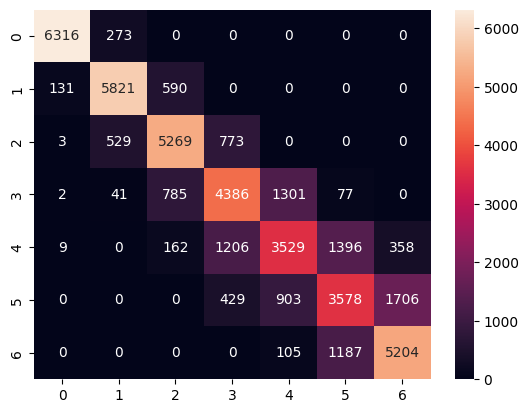

In [191]:
pred_train_a = modelo_a.predict(X_train_a)
pred_test_a = modelo_a.predict(X_test_a)

acc_train_a = accuracy_score(Y_train_a, pred_train_a)
print(acc_train_a)

mat_train_a = confusion_matrix(Y_train_a, pred_train_a)
sb.heatmap(mat_train_a, annot = True, fmt = 'd')
plt.show

Modelo a: Prueba 

0.7371992909597367


<function matplotlib.pyplot.show(close=None, block=None)>

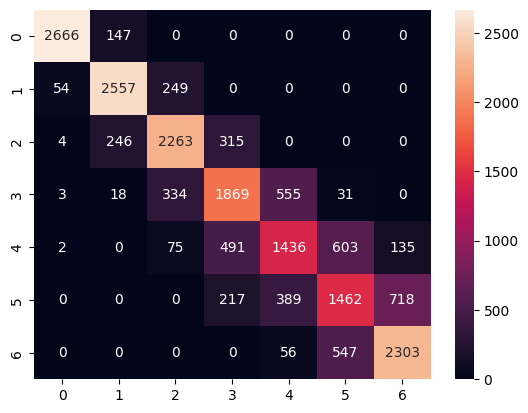

In [192]:
acc_test_a = accuracy_score(Y_test_a, pred_test_a)
print(acc_test_a)

mat_test_a = confusion_matrix(Y_test_a, pred_test_a)
sb.heatmap(mat_test_a, annot = True, fmt = 'd')
plt.show


## B) Usando todas las variables

In [193]:
# Separar X de Y

X = datos_proc.drop('loan_grade', axis = 1)
Y = datos_proc[['loan_grade']]
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
1,24,83000,RENT,8.0,PERSONAL,35000,8.90,1,0.42,N,2
2,21,10000,OWN,2.0,HOMEIMPROVEMENT,4500,8.63,1,0.45,N,2
3,23,95000,RENT,2.0,VENTURE,35000,7.90,1,0.37,N,2
4,23,115000,RENT,2.0,EDUCATION,35000,7.90,0,0.30,N,4
...,...,...,...,...,...,...,...,...,...,...,...
65809,37,88000,RENT,4.0,PERSONAL,25000,19.66,1,0.28,Y,12
65810,28,82000,RENT,12.0,VENTURE,16750,20.11,1,0.20,N,6
65811,42,153000,MORTGAGE,7.0,EDUCATION,25000,20.53,1,0.16,N,14
65812,34,108000,MORTGAGE,4.0,DEBTCONSOLIDATION,25000,20.03,1,0.23,N,8


In [194]:
Y

,loan_grade
0,0
1,0
2,0
3,0
4,0
...,...
65809,6
65810,6
65811,6
65812,6


In [195]:
# Diseñar un procesador de datos

numCols = X.select_dtypes(include = ['float64','int64']).columns.to_list()
catCols = X.select_dtypes(include = ['object']).columns.to_list()
preprocesador = ColumnTransformer(transformers = [('num', numTransformer, numCols), ('cat', catTransformer, catCols)], remainder = 'passthrough')
set_config(display = 'diagram')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_status',
                                  'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'cb_person_default_on_file'])])

In [196]:
Xpre = preprocesador.fit_transform(X)
Xpre

array([[0.015625  , 0.00285896, 0.01626016, ..., 1.        , 1.        ,
        0.        ],
       [0.0625    , 0.03876792, 0.06504065, ..., 0.        , 1.        ,
        0.        ],
       [0.015625  , 0.00290808, 0.01626016, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.34375   , 0.07315405, 0.05691057, ..., 0.        , 1.        ,
        0.        ],
       [0.21875   , 0.05104868, 0.03252033, ..., 0.        , 1.        ,
        0.        ],
       [0.28125   , 0.03876792, 0.02439024, ..., 0.        , 0.        ,
        1.        ]])

In [197]:
codCat = preprocesador.named_transformers_['cat']['onehot'].get_feature_names_out(catCols)
labels = np.concatenate([numCols, codCat])
Xpro = pd.DataFrame(Xpre, columns = labels)
Xpro

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0.015625,0.002859,0.016260,0.057971,0.096629,1.0,0.301205,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.062500,0.038768,0.065041,1.000000,0.195506,1.0,0.506024,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.015625,0.002908,0.016260,0.115942,0.180337,1.0,0.542169,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.046875,0.044663,0.016260,1.000000,0.139326,1.0,0.445783,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.046875,0.054487,0.016260,1.000000,0.139326,0.0,0.361446,0.071429,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65809,0.265625,0.041224,0.032520,0.710145,0.800000,1.0,0.337349,0.357143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
65810,0.125000,0.038277,0.097561,0.471014,0.825281,1.0,0.240964,0.142857,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
65811,0.343750,0.073154,0.056911,0.710145,0.848876,1.0,0.192771,0.428571,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
65812,0.218750,0.051049,0.032520,0.710145,0.820787,1.0,0.277108,0.214286,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Separacion en entrenamiento y prueba

In [198]:
X_train_b, X_test_b, Y_train_b, Y_test_b = train_test_split(Xpro, Y, train_size = 0.7, random_state = 126)

## Modelado de datos

Regresion logistica

In [199]:
modelo_b = LogisticRegression()
modelo_b.fit(X_train_b, Y_train_b)

LogisticRegression()

In [200]:
# Traer información
modelo_b.intercept_

array([  5.41238211,   1.84321805,   9.04915996,   4.61024277,
        -0.08217089,  -5.2626506 , -15.5701814 ])

In [201]:
modelo_b.coef_

array([[-1.77752568e-02,  5.53098276e-02,  1.09142275e-01,
        -2.60752591e+00, -5.56045447e+01, -1.73009767e+00,
         9.62226059e-01,  1.21417714e-01,  1.23323701e+00,
         7.69430883e-01,  1.19783980e+00,  1.24379948e+00,
         1.04608684e+00,  5.77610706e-01,  5.45590079e-01,
         1.02566111e+00,  7.87446227e-01,  4.61912203e-01,
         1.59892823e+01, -1.15449752e+01],
       [-2.95245395e-01, -1.36236416e-01,  3.77259804e-01,
        -1.32405747e+00, -2.74851676e+01, -1.69386804e+00,
         5.30228729e-01,  3.07582183e-01,  5.77883972e-01,
        -3.84375753e-01,  5.69045520e-01,  8.63667800e-01,
         5.74147907e-01, -2.51555851e-02,  1.10532266e-01,
         5.78807192e-01,  3.04342713e-01,  8.35470460e-02,
         1.42693598e+01, -1.26431383e+01],
       [-3.54297299e-01,  4.99543639e-01, -6.87292690e-01,
        -1.74691063e+00, -1.09349729e+01, -1.68882065e+00,
         8.13936976e-01,  5.51351466e-01,  1.80692148e+00,
         1.41062684e+00,  1.6

## Evaluación del modelo

Modelo b: Entrenamiento

0.74590288480323


<function matplotlib.pyplot.show(close=None, block=None)>

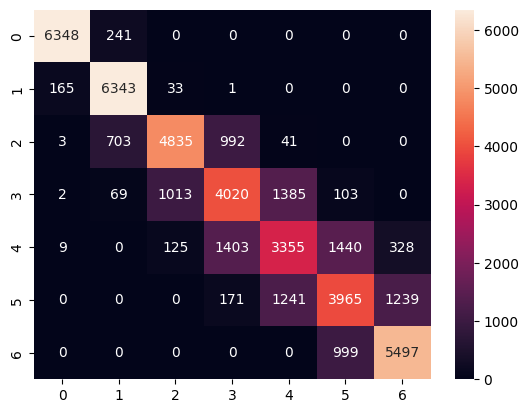

In [202]:

pred_train_b = modelo_b.predict(X_train_b)
pred_test_b = modelo_b.predict(X_test_b)

acc_train_b = accuracy_score(Y_train_b, pred_train_b)
print(acc_train_b)

mat_train_b = confusion_matrix(Y_train_b, pred_train_b)
sb.heatmap(mat_train_b, annot = True, fmt = 'd')
plt.show

Modelo b: Prueba

0.7463155229171943


<function matplotlib.pyplot.show(close=None, block=None)>

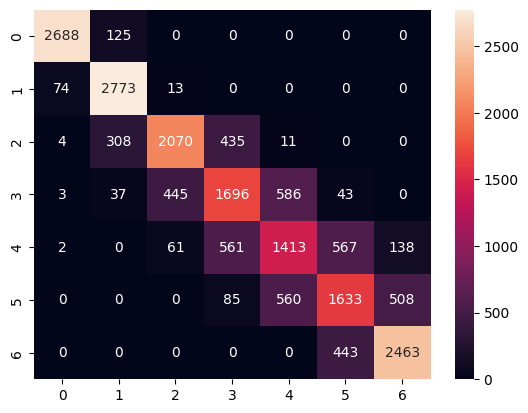

In [203]:

acc_test_b = accuracy_score(Y_test_b, pred_test_b)
print(acc_test_b)

mat_test_b = confusion_matrix(Y_test_b, pred_test_b)
sb.heatmap(mat_test_b, annot = True, fmt = 'd')
plt.show

## Modelo C SVM

In [204]:
modelo_c = SVC()
modelo_c.fit(X_train_b, Y_train_b)

SVC()

## Evaluacion del modelo

Modelo C: Entrenamiento

0.8288436909852612


<function matplotlib.pyplot.show(close=None, block=None)>

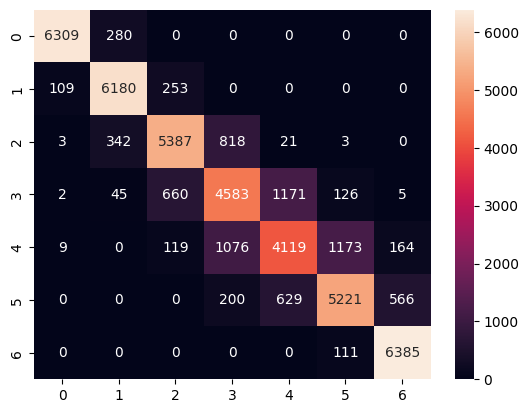

In [209]:
pred_train_c = modelo_c.predict(X_train_b)
pred_test_c = modelo_c.predict(X_test_b)

acc_train_c = accuracy_score(Y_train_b, pred_train_c)
print(acc_train_c)

mat_train_c = confusion_matrix(Y_train_b, pred_train_c)
sb.heatmap(mat_train_c, annot = True, fmt = 'd')
plt.show

Modelo c: Prueba

0.8225373512281591


<function matplotlib.pyplot.show(close=None, block=None)>

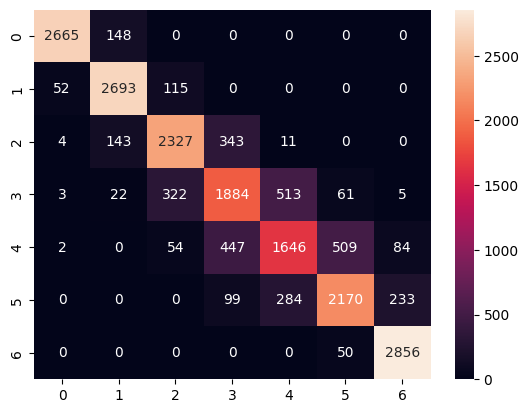

In [210]:
acc_test_c = accuracy_score(Y_test_b, pred_test_c)
print(acc_test_c)

mat_test_c = confusion_matrix(Y_test_b, pred_test_c)
sb.heatmap(mat_test_c, annot = True, fmt = 'd')
plt.show

## Modelo d red neuronal

In [211]:
modelo_d = MLPClassifier()
modelo_d.fit(X_train_b, Y_train_b)

MLPClassifier()

## Evaluacion del modelo

Modelo d: Entrenamiento

0.8689791399856737


<function matplotlib.pyplot.show(close=None, block=None)>

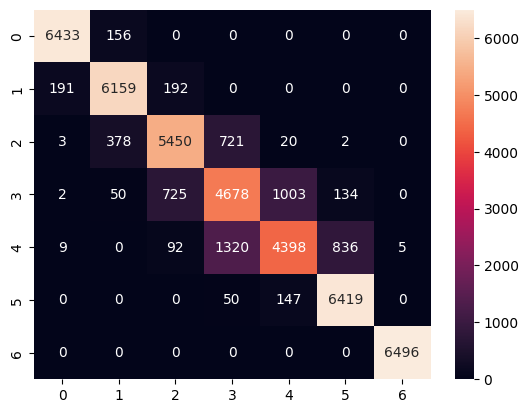

In [212]:
pred_train_d = modelo_d.predict(X_train_b)
pred_test_d = modelo_d.predict(X_test_b)

acc_train_d = accuracy_score(Y_train_b, pred_train_d)
print(acc_train_d)

mat_train_d = confusion_matrix(Y_train_b, pred_train_d)
sb.heatmap(mat_train_d, annot = True, fmt = 'd')
plt.show

Modelo d: Prueba

0.8622942517092935


<function matplotlib.pyplot.show(close=None, block=None)>

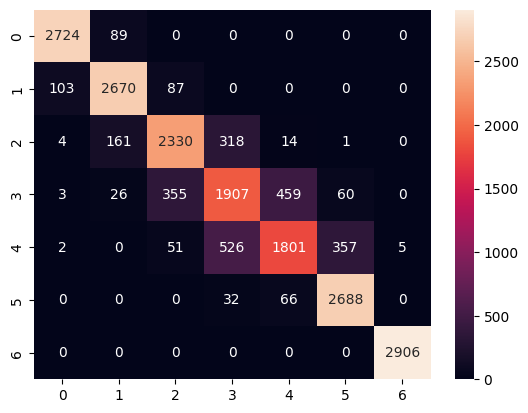

In [213]:
acc_test_d = accuracy_score(Y_test_b, pred_test_d)
print(acc_test_d)

mat_test_d = confusion_matrix(Y_test_b, pred_test_d)
sb.heatmap(mat_test_d, annot = True, fmt = 'd')
plt.show